# Basic Regression with scikit learn

Beispiel Schweizer House Preise von Immoscout 24 vom 28.08.2021.

https://www.immoscout24.ch/de/haus/kaufen/ort-bern?r=30

# Bibliotheken importieren

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Daten einlesen

In [38]:
df = pd.read_json('swiss-houses-v2.json')
df

,id,link,livingSpace,plotArea,floorSpace,municipality,price,lastRenovation,constructionYear
0,6649184,https://www.immoscout24.ch/en/d/6649184,NaN,NaN,NaN,None,NaN,NaN,NaN
1,6649183,https://www.immoscout24.ch/en/d/6649183,146.0,178.0,292.0,Rumendingen,780000.0,NaN,2022.0
2,6648035,https://www.immoscout24.ch/en/d/6648035,187.0,568.0,NaN,Gibloux,935000.0,NaN,2022.0
3,6617220,https://www.immoscout24.ch/en/d/6617220,146.0,776.0,218.0,Kirchberg (BE),895000.0,2017.0,1984.0
4,6646402,https://www.immoscout24.ch/en/d/6646402,173.0,761.0,758.0,Orvin,880000.0,NaN,2010.0
...,...,...,...,...,...,...,...,...,...
787,6481327,https://www.immoscout24.ch/en/d/6481327,616.0,7000.0,NaN,Fribourg,NaN,2000.0,1832.0
788,6329543,https://www.immoscout24.ch/en/d/6329543,280.0,NaN,NaN,Avenches,1150000.0,NaN,NaN
789,5842152,https://www.immoscout24.ch/en/d/5842152,NaN,NaN,NaN,None,NaN,NaN,NaN
790,6613262,https://www.immoscout24.ch/en/d/6613262,117.0,NaN,NaN,Val-de-Ruz,NaN,NaN,NaN


## Daten filtern

Zeilen rausfiltern die kein Wert haben z.B. bei Preis auf Anfrage oder keine Angabe zur Grundstückfläche.

In [39]:
df = df[df['price'].notna() & df['plotArea'].notna() & df['constructionYear'].notna() & df['livingSpace'].notna()]
df

,id,link,livingSpace,plotArea,floorSpace,municipality,price,lastRenovation,constructionYear
1,6649183,https://www.immoscout24.ch/en/d/6649183,146.0,178.0,292.0,Rumendingen,780000.0,NaN,2022.0
2,6648035,https://www.immoscout24.ch/en/d/6648035,187.0,568.0,NaN,Gibloux,935000.0,NaN,2022.0
3,6617220,https://www.immoscout24.ch/en/d/6617220,146.0,776.0,218.0,Kirchberg (BE),895000.0,2017.0,1984.0
4,6646402,https://www.immoscout24.ch/en/d/6646402,173.0,761.0,758.0,Orvin,880000.0,NaN,2010.0
5,6640757,https://www.immoscout24.ch/en/d/6640757,120.0,564.0,NaN,Stettlen,980000.0,NaN,2000.0
...,...,...,...,...,...,...,...,...,...
763,6640747,https://www.immoscout24.ch/en/d/6640747,202.0,313.0,159.0,Seeberg,798000.0,NaN,2022.0
766,6599746,https://www.immoscout24.ch/en/d/6599746,120.0,560.0,NaN,Derendingen,850000.0,2018.0,1946.0
775,6599640,https://www.immoscout24.ch/en/d/6599640,130.0,396.0,NaN,Fribourg,695000.0,NaN,2018.0
776,6551566,https://www.immoscout24.ch/en/d/6551566,137.0,415.0,NaN,Rüttenen,975000.0,NaN,2021.0


### Daten formatieren / Feature Engineering

Preis und Wohnfläche in eine Ganzzahl umwandlen

In [40]:
houses = df.copy()
houses['price'] = houses['price'].copy() / 1000
houses = houses.astype({'price': int, 'livingSpace': int, 'plotArea': int, 'constructionYear':int})
houses

,id,link,livingSpace,plotArea,floorSpace,municipality,price,lastRenovation,constructionYear
1,6649183,https://www.immoscout24.ch/en/d/6649183,146.0,178,292.0,Rumendingen,780,NaN,2022
2,6648035,https://www.immoscout24.ch/en/d/6648035,187.0,568,NaN,Gibloux,935,NaN,2022
3,6617220,https://www.immoscout24.ch/en/d/6617220,146.0,776,218.0,Kirchberg (BE),895,2017.0,1984
4,6646402,https://www.immoscout24.ch/en/d/6646402,173.0,761,758.0,Orvin,880,NaN,2010
5,6640757,https://www.immoscout24.ch/en/d/6640757,120.0,564,NaN,Stettlen,980,NaN,2000
...,...,...,...,...,...,...,...,...,...
763,6640747,https://www.immoscout24.ch/en/d/6640747,202.0,313,159.0,Seeberg,798,NaN,2022
766,6599746,https://www.immoscout24.ch/en/d/6599746,120.0,560,NaN,Derendingen,850,2018.0,1946
775,6599640,https://www.immoscout24.ch/en/d/6599640,130.0,396,NaN,Fribourg,695,NaN,2018
776,6551566,https://www.immoscout24.ch/en/d/6551566,137.0,415,NaN,Rüttenen,975,NaN,2021


## Daten Analyse

Statistische Zusammenfassung (AVG / Min / Max) Preis.

In [41]:
houses['price'].describe()

count     492.000000
mean     1126.546748
std       608.372588
min       155.000000
25%       770.000000
50%       950.000000
75%      1290.000000
max      3950.000000
Name: price, dtype: float64

Statistische Zusammenfassung (AVG / Min / Max) - Wohnfläche

In [42]:
houses['livingSpace'].describe()

count     492.000000
mean      806.400407
std       931.154906
min        27.000000
25%       350.000000
50%       566.500000
75%       908.250000
max      8337.000000
Name: plotArea, dtype: float64

### Preisanalyse

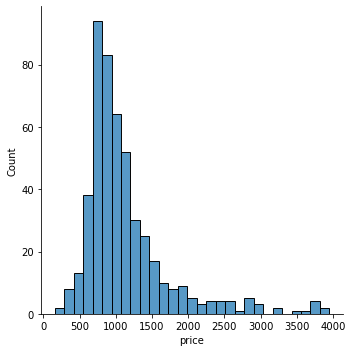

In [43]:
# Histogram
sns.displot(houses['price']);

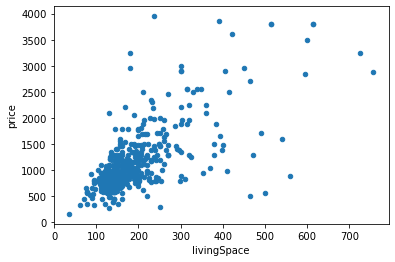

In [44]:
# Scatter Plot livingSpace/price
data = pd.concat([houses['price'], houses['livingSpace']], axis=1)
data.plot.scatter(x='livingSpace', y='price');

# Modell tranieren

## Daten aufteilen in Trainings- und Testmenge

Das Aufteilen der Daten geschieht mit einer Hilfsfunktion von scikit learn. Die Aufteilung geschieht zufällig, um aber das Resultat reproduzierbar zu machen wird (mit `random_state=1`) steht dieselbe Zufallsauswahl gewählt.

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(houses['livingSpace'].to_numpy().reshape(-1, 1), houses['price'], test_size=0.5, random_state=1)

### Modell tranieren

In [46]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)

### Modell evaluieren

In [47]:
# Score
# Score
from sklearn.metrics import mean_absolute_error

print('Mean absolute error (training) {:.3f}', mean_absolute_error(y_train, linreg.predict(X_train)))
print('Mean absolute error (test) {:.3f}', mean_absolute_error(y_test, linreg.predict(X_test)))

print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Mean absolute error (training) {:.3f} 293.90548884772033
Mean absolute error (test) {:.3f} 277.5284029023575
R-squared score (training): 0.427
R-squared score (test): 0.515


#### R-squared score

Wert zwischen 0 und 1.

<img src="./image-rsquared.png" alt="rsqaured" />

### Modell Graphisch evaluieren

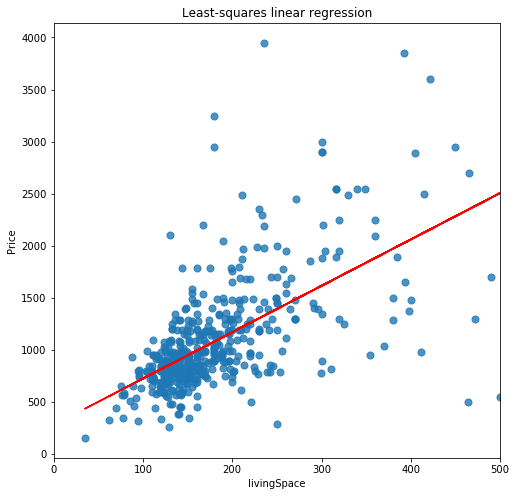

In [48]:
plt.figure(figsize=(8,8))
plt.scatter(houses['livingSpace'].to_numpy(), houses['price'].to_numpy(), marker= 'o', s=50, alpha=0.8)
plt.plot(houses['livingSpace'].to_numpy(), linreg.coef_ * houses['livingSpace'].to_numpy() + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('livingSpace')
plt.ylabel('Price')
plt.xlim([0,500])
plt.show()

### Modell mit 3 Features (Wohnfläche, Grundstückfläche und Baujahr) tranieren

In [49]:
X_train, X_test, y_train, y_test = train_test_split(houses[['livingSpace', 'plotArea', 'constructionYear']], houses['price'], test_size=0.5, random_state=1)

In [50]:
X_train

,livingSpace,plotArea,constructionYear
504,151.0,334,1976
526,207.0,939,1984
56,266.0,507,2011
233,197.0,536,2001
591,184.0,999,1939
...,...,...,...
367,136.0,150,1998
102,250.0,799,1962
590,213.0,154,2001
341,236.0,971,1918


In [51]:
linreg = LinearRegression().fit(X_train, y_train)

In [52]:
from sklearn.metrics import mean_squared_error

# Score
print('Mean absolute error (training) {:.3f}', mean_absolute_error(y_train, linreg.predict(X_train)))
print('Mean absolute error (test) {:.3f}', mean_absolute_error(y_test, linreg.predict(X_test)))

print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Mean absolute error (training) {:.3f} 285.35576767585553
Mean absolute error (test) {:.3f} 262.7015395545649
R-squared score (training): 0.443
R-squared score (test): 0.559
